In [164]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [165]:
df = pd.read_excel('flight_vs_covid_edit.xlsx')
df

,DateTime,Flights,MovingAvg,date,total_cases,new_cases,new_cases_per_billion,new_cases_smoothed,new_cases_smoothed_per_billion,Day,...,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred
0,2021-01-01,55951,68909,44197,84296831,566617,71723.670886,598028.429,75699.801139,340,...,2,204487,1040694,0.15,0.09,0.00,0.00,132,602177,0.008
1,2021-01-02,67204,69069,44198,84902473,605642,76663.544304,612020.286,77470.922278,341,...,2,1181993,1184117,0.17,0.11,0.00,0.00,150,745924,0.009
2,2021-01-03,74148,69390,44199,85425434,522961,66197.594937,624852.857,79095.298354,342,...,2,364723,1199126,0.17,0.11,0.00,0.00,152,760249,0.010
3,2021-01-04,73561,69661,44200,85975750,550316,69660.253165,633734.286,80219.529873,343,...,2,1130604,1249774,0.19,0.13,0.00,0.00,159,803559,0.010
4,2021-01-05,70386,69282,44201,86719564,743814,94153.670886,643933.857,81510.614810,344,...,2,2114689,1411230,0.21,0.14,0.00,0.00,179,835700,0.011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,2021-11-24,95597,92954,44524,259467478,672616,85141.265823,569569.571,72097.414051,667,...,225756854,36999544,31796155,99.50,53.90,42.32,2.87,4038,26888496,0.341
328,2021-11-25,84696,91386,44525,260063320,595842,75423.037975,567100.143,71784.828228,668,...,230031719,28599022,31473844,99.86,53.98,42.45,2.92,3997,26709293,0.339
329,2021-11-26,86960,89667,44526,260660212,596892,75555.949367,564384.571,71441.084937,669,...,234168790,34894810,31785581,100.31,54.09,42.61,2.97,4036,8898368,0.113
330,2021-11-27,84404,89326,44527,261073662,413450,52335.443038,555353.286,70297.884304,670,...,237438402,27160757,30660648,100.65,54.17,42.71,3.02,3893,8311865,0.106


In [166]:
X = df.loc[:, ['Day', 'people_vaccinated', 'new_cases_smoothed', 'total_cases']]
y = df.loc[:, ['MovingAvg']]

In [167]:
X

,Day,people_vaccinated,new_cases_smoothed,total_cases
0,340,7375801,598028.429,84296831
1,341,8557196,612020.286,84902473
2,342,8920237,624852.857,85425434
3,343,9985978,633734.286,85975750
4,344,11185616,643933.857,86719564
...,...,...,...,...
327,667,4244279117,569569.571,259467478
328,668,4251125889,567100.143,260063320
329,669,4259854538,564384.571,260660212
330,670,4265942495,555353.286,261073662


In [168]:
y

,MovingAvg
0,68909
1,69069
2,69390
3,69661
4,69282
...,...
327,92954
328,91386
329,89667
330,89326


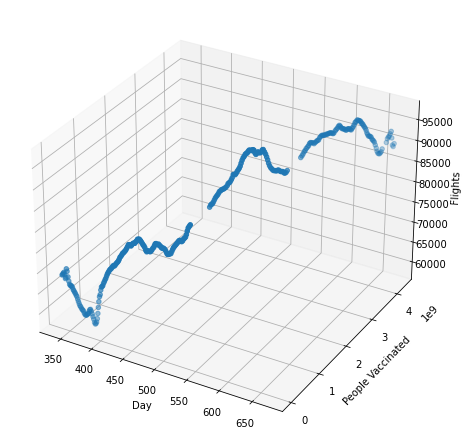

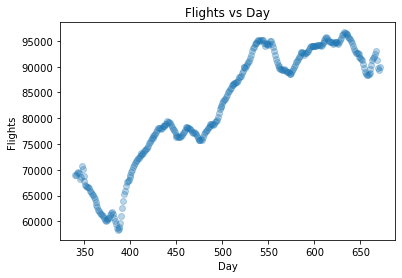

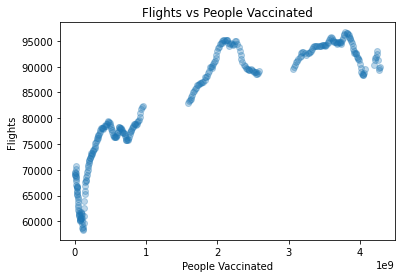

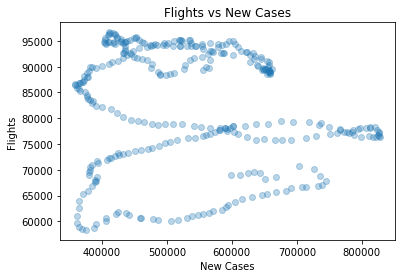

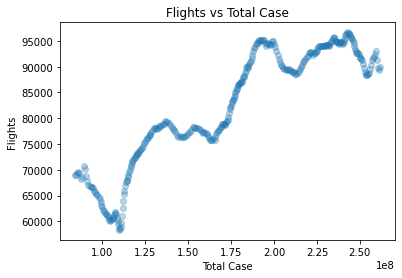

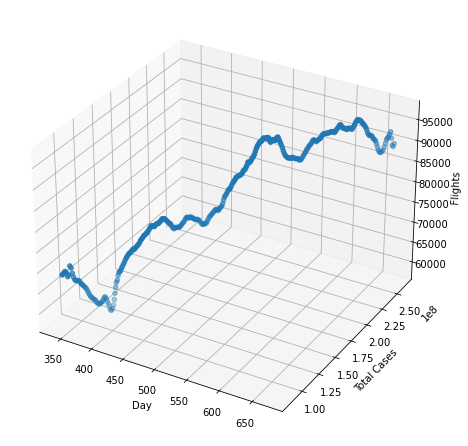

In [169]:
figcl = plt.figure(figsize = [6,6])
clplot = Axes3D(figcl)
clplot.scatter(df['Day'], df['people_vaccinated'], df['MovingAvg'])
clplot.set_xlabel('Day')
clplot.set_ylabel('People Vaccinated')
clplot.set_zlabel('Flights')
plt.show()

plt.scatter(df['Day'], df['MovingAvg'], alpha = 0.3)
plt.xlabel('Day')
plt.ylabel('Flights')
plt.title('Flights vs Day')
plt.show()

plt.scatter(df['people_vaccinated'], df['MovingAvg'], alpha = 0.3)
plt.xlabel('People Vaccinated')
plt.ylabel('Flights')
plt.title('Flights vs People Vaccinated')
plt.show()

plt.scatter(df['new_cases_smoothed'], df['MovingAvg'], alpha = 0.3)
plt.xlabel('New Cases')
plt.ylabel('Flights')
plt.title('Flights vs New Cases')
plt.show()

plt.scatter(df['total_cases'], df['MovingAvg'], alpha = 0.3)
plt.xlabel('Total Case')
plt.ylabel('Flights')
plt.title('Flights vs Total Case')
plt.show()

figFlights = plt.figure(figsize = [6,6])
clplot = Axes3D(figFlights)
clplot.scatter(df['Day'], df['total_cases'], df['MovingAvg'])
clplot.set_xlabel('Day')
clplot.set_ylabel('Total Cases')
clplot.set_zlabel('Flights')
plt.show()


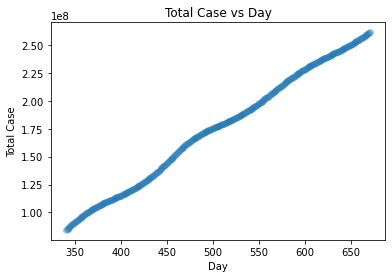

In [170]:
plt.scatter(df['Day'], df['total_cases'], alpha = 0.3)
plt.xlabel('Day')
plt.ylabel('Total Case')
plt.title('Total Case vs Day')
plt.show()

In [171]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 29)

In [172]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scalery = MinMaxScaler()

In [173]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = scalery.fit_transform(y_train)
y_test = scalery.transform(y_test)

In [174]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [175]:
NNmodel = Sequential()

NNmodel.add(Dense(256,activation='relu')) #Hidden Layer
#NNmodel.add(Dropout(0.2))
NNmodel.add(Dense(256,activation='relu')) #Hidden Layer
#NNmodel.add(Dropout(0.2))
NNmodel.add(Dense(4,activation='relu')) #Hidden Layer
#NNmodel.add(Dropout(0.2))

NNmodel.add(Dense(units = 1,activation='linear')) #Output Layer

NNmodel.compile(loss='mse', optimizer='adam')

In [176]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)

In [177]:
NNmodel.fit(x=X_train, y=y_train, epochs=100, validation_data=(X_test,y_test), callbacks=[early_stop])

Epoch 1/100
8/8 [==============================] - 0s 11ms/step - loss: 0.1734 - val_loss: 0.0368
Epoch 2/100
8/8 [==============================] - 0s 2ms/step - loss: 0.0321 - val_loss: 0.0198
Epoch 3/100
8/8 [==============================] - 0s 2ms/step - loss: 0.0210 - val_loss: 0.0196
Epoch 4/100
8/8 [==============================] - 0s 2ms/step - loss: 0.0176 - val_loss: 0.0213
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 0.0160 - val_loss: 0.0177
Epoch 6/100
8/8 [==============================] - 0s 2ms/step - loss: 0.0141 - val_loss: 0.0213
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 0.0135 - val_loss: 0.0169
Epoch 8/100
8/8 [==============================] - 0s 2ms/step - loss: 0.0127 - val_loss: 0.0172
Epoch 9/100
8/8 [==============================] - 0s 2ms/step - loss: 0.0117 - val_loss: 0.0157
Epoch 10/100
8/8 [==============================] - 0s 3ms/step - loss: 0.0113 - val_loss: 0.0160
Epoch 11/100
8/8 [==========

8/8 [==============================] - 0s 5ms/step - loss: 7.3998e-04 - val_loss: 0.0011
Epoch 85/100
8/8 [==============================] - 0s 5ms/step - loss: 8.2302e-04 - val_loss: 0.0011
Epoch 86/100
8/8 [==============================] - 0s 4ms/step - loss: 7.3615e-04 - val_loss: 0.0012
Epoch 87/100
8/8 [==============================] - 0s 2ms/step - loss: 8.8271e-04 - val_loss: 0.0010
Epoch 88/100
8/8 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 89/100
8/8 [==============================] - 0s 2ms/step - loss: 7.9717e-04 - val_loss: 0.0011
Epoch 90/100
8/8 [==============================] - 0s 2ms/step - loss: 9.0169e-04 - val_loss: 0.0012
Epoch 91/100
8/8 [==============================] - 0s 2ms/step - loss: 9.5736e-04 - val_loss: 9.7215e-04
Epoch 92/100
8/8 [==============================] - 0s 3ms/step - loss: 6.7925e-04 - val_loss: 0.0010
Epoch 93/100
8/8 [==============================] - 0s 4ms/step - loss: 6.7806e-04 - val_loss: 

<AxesSubplot:>

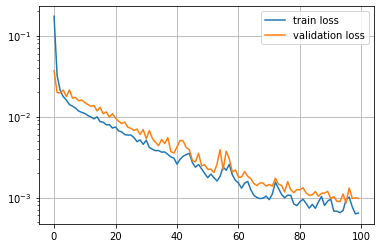

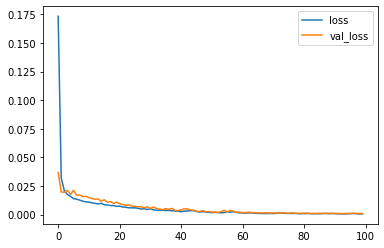

In [178]:
losses = pd.DataFrame(NNmodel.history.history)
plt.grid()
plt.yscale("log")
plt.plot(losses['loss'], label='train loss')
plt.plot(losses['val_loss'], label='validation loss')
plt.legend()
losses[['loss', 'val_loss']].plot()

In [179]:
predictions = NNmodel.predict(X_test)

In [180]:
predictions = scalery.inverse_transform(predictions)
y_test = scalery.inverse_transform(y_test)

In [181]:
mse_MovingAvg = mean_squared_error(y_test[:,0], predictions[:,0])
print(f"Mean Squared Error for MovingAvg: {mse_MovingAvg}")
mae_MovingAvg = np.sum(np.absolute(y_test[:,0]- predictions[:,0]))/len(y_test)
print(f"Mean Absolute Error for MovingAvg: {mae_MovingAvg}\n")

Mean Squared Error for MovingAvg: 1394774.4139675898
Mean Absolute Error for MovingAvg: 872.3410937499997



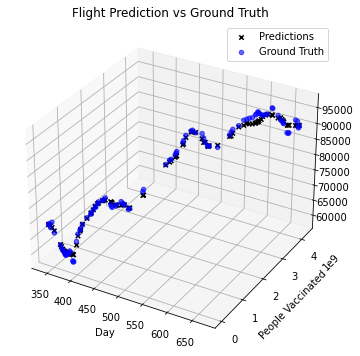

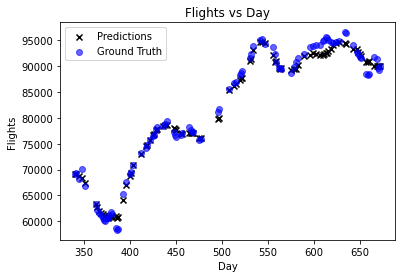

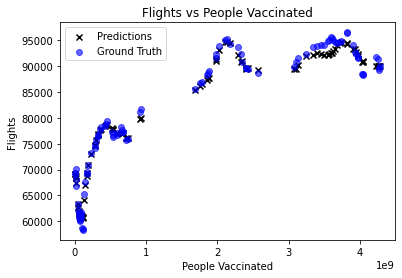

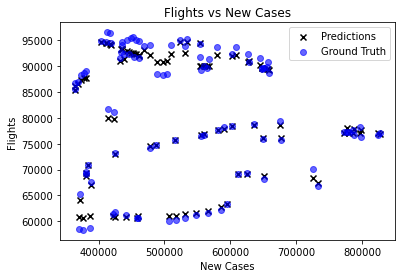

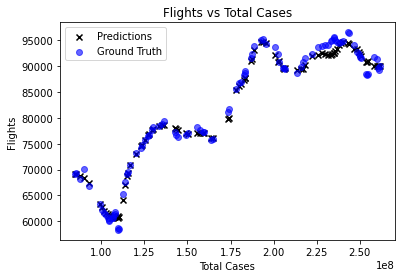

In [182]:
# Creating figure Cl
fig = plt.figure(figsize = (8, 6))
visual_split = plt.axes(projection ="3d")
 
# Creating plot
visual_split.scatter3D(scaler.inverse_transform(X_test)[:,0], scaler.inverse_transform(X_test)[:,1], predictions[:,0], color = "black", alpha=1, label='Predictions', marker='x')
visual_split.scatter3D(scaler.inverse_transform(X_test)[:,0], scaler.inverse_transform(X_test)[:,1], y_test[:,0], color = "blue", alpha=0.6, label='Ground Truth')
plt.title("Flight Prediction vs Ground Truth")
plt.xlabel('Day')
plt.ylabel('People Vaccinated')
plt.legend()
plt.show()

plt.scatter(scaler.inverse_transform(X_test)[:,0], predictions[:,0], color = "black", alpha=1, label='Predictions', marker='x')
plt.scatter(scaler.inverse_transform(X_test)[:,0], y_test[:,0], color = "blue", alpha=0.6, label='Ground Truth')
plt.xlabel('Day')
plt.ylabel('Flights')
plt.title('Flights vs Day')
plt.legend()
plt.show()

plt.scatter(scaler.inverse_transform(X_test)[:,1], predictions[:,0], color = "black", alpha=1, label='Predictions', marker='x')
plt.scatter(scaler.inverse_transform(X_test)[:,1], y_test[:,0], color = "blue", alpha=0.6, label='Ground Truth')
plt.xlabel('People Vaccinated')
plt.ylabel('Flights')
plt.title('Flights vs People Vaccinated')
plt.legend()
plt.show()

plt.scatter(scaler.inverse_transform(X_test)[:,2], predictions[:,0], color = "black", alpha=1, label='Predictions', marker='x')
plt.scatter(scaler.inverse_transform(X_test)[:,2], y_test[:,0], color = "blue", alpha=0.6, label='Ground Truth')
plt.xlabel('New Cases')
plt.ylabel('Flights')
plt.title('Flights vs New Cases')
plt.legend()
plt.show()

plt.scatter(scaler.inverse_transform(X_test)[:,3], predictions[:,0], color = "black", alpha=1, label='Predictions', marker='x')
plt.scatter(scaler.inverse_transform(X_test)[:,3], y_test[:,0], color = "blue", alpha=0.6, label='Ground Truth')
plt.xlabel('Total Cases')
plt.ylabel('Flights')
plt.title('Flights vs Total Cases')
plt.legend()
plt.show()

In [183]:
sample_number = 6
#alldata=len(predictions)
print("[Flight]")
for i in range (sample_number):
    print(f"Sample Data {i+1}: {y_test[i]}")
    print(f"Prediction {i+1}: {predictions[i]}")
    error = np.abs(y_test[i]-predictions[i])
    print(f"error: {error}\n--------------------------------------------------")


[Flight]
Sample Data 1: [61281.]
Prediction 1: [61538.59]
error: [257.58984375]
--------------------------------------------------
Sample Data 2: [95246.]
Prediction 2: [94721.]
error: [525.]
--------------------------------------------------
Sample Data 3: [88739.]
Prediction 3: [89360.81]
error: [621.8125]
--------------------------------------------------
Sample Data 4: [58457.]
Prediction 4: [60752.]
error: [2295.]
--------------------------------------------------
Sample Data 5: [92329.]
Prediction 5: [90906.54]
error: [1422.4609375]
--------------------------------------------------
Sample Data 6: [90911.]
Prediction 6: [90983.22]
error: [72.21875]
--------------------------------------------------
